# Appendix A - test whether there is a correlation between sound power and score.

This is done by taking a focal sample and decreasing the signal amplitude in 3dB steps, then plotting the recognizer score against signal amplitude for each step. 

In [44]:
# imports
from pathlib import Path
import sys
BASE_PATH = Path.cwd().parent.parent
sys.path.append(str(BASE_PATH))
model_save_path = BASE_PATH / 'models'
import pandas as pd
import opensoundscape as opso
from opensoundscape import audio, Audio
import glob
from src.utils import  show_samples_in_df, show_sample_from_df

In [45]:
# Load the data
data_path = BASE_PATH / 'data'
valid_df = pd.read_pickle(data_path / 'interim' / 'valid_set' / 'balanced_valid_set_verified.pkl')

### Find the location with the most samples

In [46]:
valid_df.location_id.value_counts()[:5]

location_id
194397    46
194361    44
194069    30
220227    30
194709    22
Name: count, dtype: int64

In [47]:
location_1_idx = valid_df.location_id.value_counts().index[0]
location_1 = valid_df[valid_df.location_id == location_1_idx]
location_1.head()

,,,recording_url,task_method,project,detection_time,tag_duration,latitude,longitude,file_type,media_url,individual_order,location_id,filename,target_present,target_absent,predicted,loss,confidence_cat,prediction,target_presence
file,start_time,end_time,,,,,,,,,,,,,,,,,,,
../../data/raw/recordings/OSFL/recording-291531.mp3,28.5,31.5,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,1SPT,CWS-Ontario Birds of James Bay Lowlands 2021,"[11.65, 29.73, 40.33]","[1.01, 1.51, 0.93]",51.5209,-85.6938,mp3,https://portal.wildtrax.ca/home/aru-tasks/reco...,3.0,194397,recording-291531.mp3,1.0,0.0,0.999374,0.000626,4,0,NaN
../../data/raw/recordings/OSFL/recording-291902.mp3,15.0,18.0,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,1SPT,CWS-Ontario Birds of James Bay Lowlands 2021,[16.49],[1.34],51.5209,-85.6938,mp3,https://portal.wildtrax.ca/home/aru-tasks/reco...,1.0,194397,recording-291902.mp3,1.0,0.0,0.994454,0.005546,4,0,NaN
../../data/raw/recordings/OSFL/recording-292860.mp3,48.0,51.0,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,1SPT,CWS-Ontario Birds of James Bay Lowlands 2021,[48.49],[1.14],51.5209,-85.6938,mp3,https://portal.wildtrax.ca/home/aru-tasks/reco...,1.0,194397,recording-292860.mp3,1.0,0.0,0.999855,0.000145,4,0,NaN
../../data/raw/recordings/OSFL/recording-292864.mp3,6.0,9.0,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,1SPT,CWS-Ontario Birds of James Bay Lowlands 2021,[6.66],[1.09],51.5209,-85.6938,mp3,https://portal.wildtrax.ca/home/aru-tasks/reco...,1.0,194397,recording-292864.mp3,1.0,0.0,0.999839,0.000161,4,0,NaN
../../data/raw/recordings/OSFL/recording-295436.mp3,21.0,24.0,https://wildtrax-aru-ca.s3.ca-central-1.amazon...,1SPM,CWS-Ontario Birds of James Bay Lowlands 2021,[22.58],[1.06],51.5209,-85.6938,mp3,https://portal.wildtrax.ca/home/aru-tasks/reco...,1.0,194397,recording-295436.mp3,1.0,0.0,0.986367,0.013633,4,0,NaN


In [63]:
model = opso.load_model(model_save_path / "ancient-frog-200.model")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


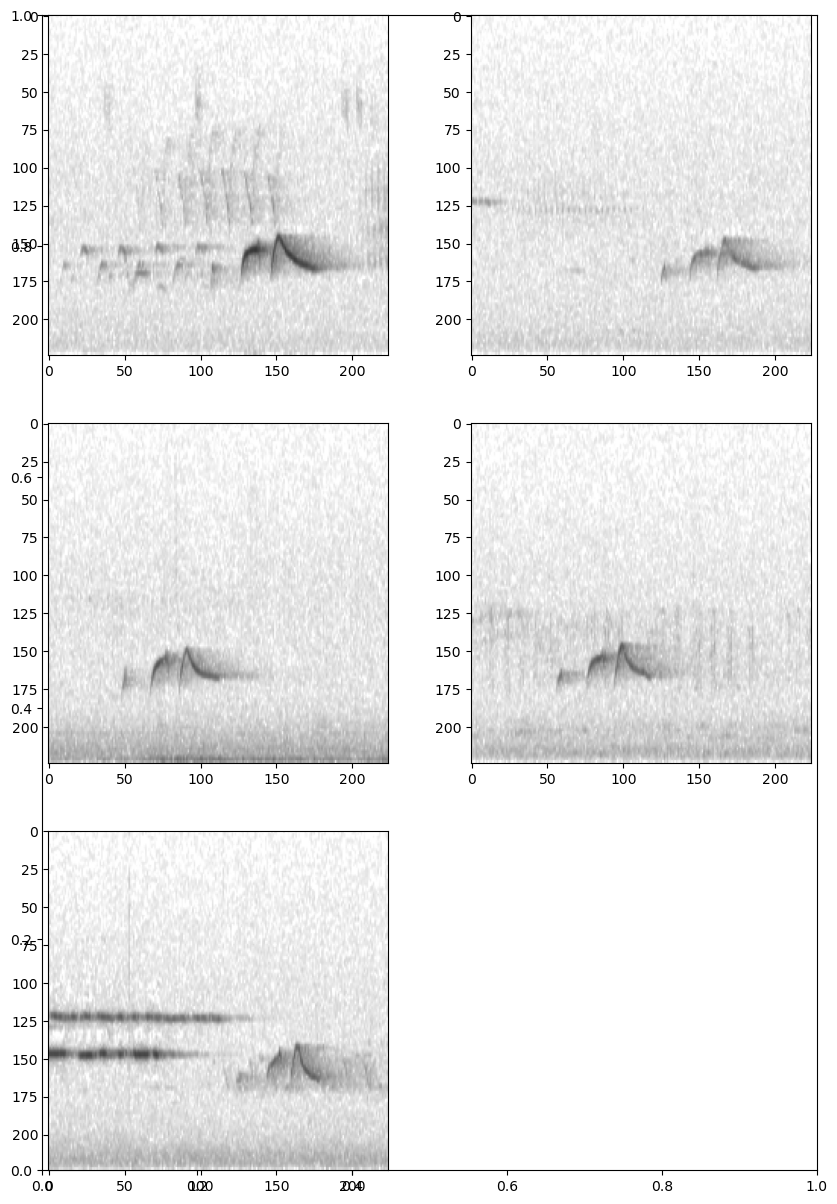

In [64]:
show_samples_in_df(location_1.head(), model)

# Choose a focal sample from location 1
Luckily the first sample in the dataframe is a focal one. 

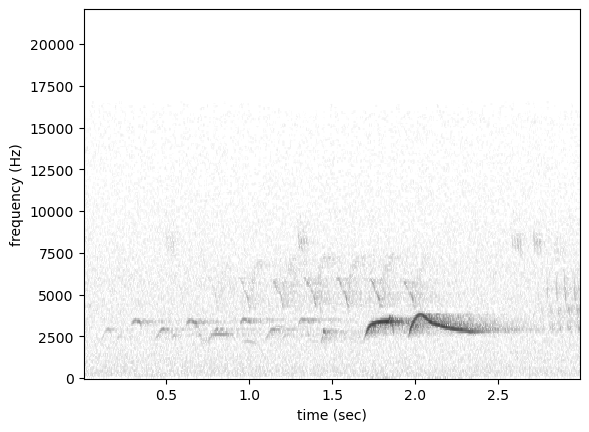

In [65]:
show_sample_from_df(location_1.head(1))

In [66]:
# Make a prediction on the audio clip
model.predict(location_1.head(1)[["target_present"]], activation_layer="sigmoid")

  0%|          | 0/1 [00:00<?, ?it/s]

,,,target_present
file,start_time,end_time,
../../data/raw/recordings/OSFL/recording-291531.mp3,28.5,31.5,0.999374


In [67]:
# extract the file path of the recording
file_path = str(location_1.head(1).index[0][0])

# extract start and end time of the clip within the recording
start_time = location_1.head(1).index[0][1]
end_time = location_1.head(1).index[0][2]
start_time, end_time

(28.5, 31.5)

In [68]:
# Create an audio object from the clip
clip_1 = Audio.from_file(file_path, offset=start_time, duration = end_time - start_time, sample_rate=None)
clip_1

<Audio(samples=(132300,), sample_rate=44100)>

# Apply gain reduction to the clip

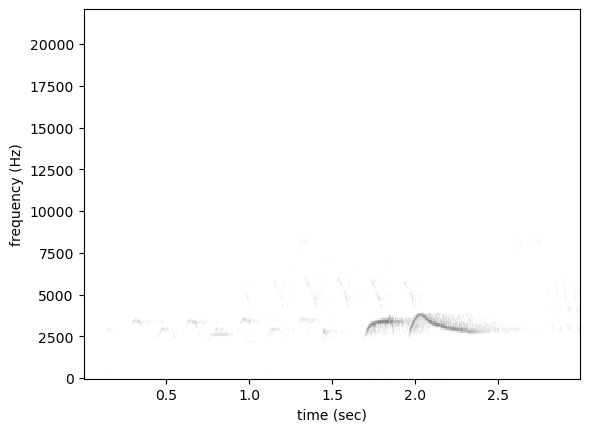

In [69]:
reduction=-20
opso.Spectrogram.from_audio(clip_1.apply_gain(reduction)).plot()

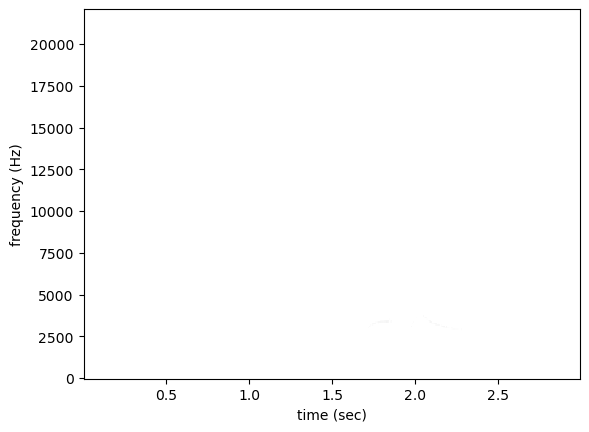

In [70]:
reduction=-57
opso.Spectrogram.from_audio(clip_1.apply_gain(reduction)).plot()

# -50 / -60 dB reduction takes us to the limit of perception
When we reduce the amplitude of this clip by 57dB, we're at the limit of what could be verified as present or absent by a human, therefore any of the target tags below this volume would be missed during the labelling and verification process, and the presence or absence of clips at these quieter volumes is not well defined, and should be considered outside the domain of the training data. 

In [71]:
# Function to save a series of reduced spl clips in 3dB decrements to disk
def save_reduced_spl_clips(clip, save_path, n=40):
    audio_objects = []
    louder_clip = clip
    audio_objects.append(louder_clip)
    for reduction in range(n):
        quieter_clip = louder_clip.apply_gain(-3)
        audio_objects.append(quieter_clip)
        louder_clip = quieter_clip

    db=0
    idx=0
    Path.mkdir(data_path / "processed" / "reduced_spl", exist_ok=True)
    for audio_object in audio_objects:
        audio_object.save(save_path / f"i_{idx}_{db}dB.wav")
        db-=3
        idx+=1

# Save reduced SPL clips to file

In [72]:
reduced_spl_path = data_path / "processed" / "reduced_spl"
save_reduced_spl_clips(clip_1,reduced_spl_path, 40)

In [73]:
audio_files = glob.glob(str(reduced_spl_path / "*.wav"))
len(audio_files)

41

In [74]:
df = model.predict(audio_files, activation_layer="sigmoid").sort_index()

  0%|          | 0/41 [00:00<?, ?it/s]

In [75]:
df.index[0][0].split("_")

['/Users/mikeg/code/machine',
 'learning/osfl',
 'cnn',
 'recognizer/data/processed/reduced',
 'spl/i',
 '0',
 '0dB.wav']

In [76]:
def extract_info_from_index(index):
    return int(index[0].split('_')[-2])  
df['file_number'] = df.index.map(extract_info_from_index)
df.sort_values(by='file_number', inplace=True)
df["-dB reduction"] = df['file_number'] * 3
df.head()

,,,target_present,file_number,-dB reduction
file,start_time,end_time,,,
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/data/processed/reduced_spl/i_0_0dB.wav,0.0,3.0,0.999344,0,0
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/data/processed/reduced_spl/i_1_-3dB.wav,0.0,3.0,0.999663,1,3
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/data/processed/reduced_spl/i_2_-6dB.wav,0.0,3.0,0.999780,2,6
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/data/processed/reduced_spl/i_3_-9dB.wav,0.0,3.0,0.999837,3,9
/Users/mikeg/code/machine_learning/osfl_cnn_recognizer/data/processed/reduced_spl/i_4_-12dB.wav,0.0,3.0,0.999837,4,12


# Plot the results

<Axes: title={'center': 'Recognizer score vs. dB reduction for one focal sample'}, xlabel='dB reduction (-dB)', ylabel='score'>

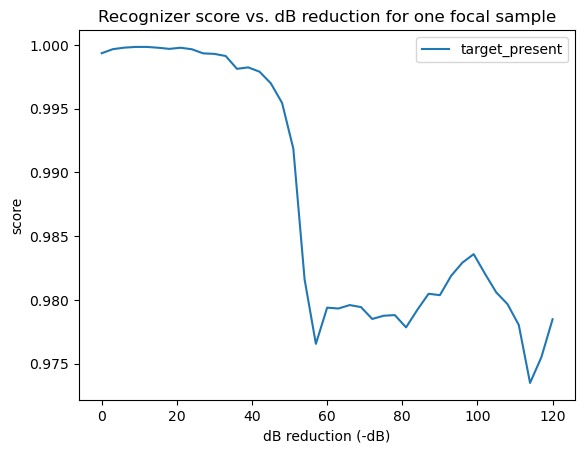

In [77]:
df.plot(x="-dB reduction", y="target_present", xlabel="dB reduction (-dB)", ylabel = "score", title="Recognizer score vs. dB reduction for one focal sample")

## From 0 to -57dB reduction, the score vs dB curve follows a smooth roll-off. 
There is a smooth relationship between recognizer output and SPL for the range of volumes which the recognizer encountered during training. This range runs from the most prominent focal example of the target, to the quietest ones which were still possible to hear or see in a spectrogram and label consistently. 

## For reductions in amplitude past 60dB the curve becomes less defined.
The recognizer still detects the target as present for reductions in SPL well beyond -60dB, but there is no smooth relationship between sound power and recognizer score for those examples. 